In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('Walmart.csv',parse_dates=['Date'], dayfirst =True)



In [2]:
# Check for missing values
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
data.duplicated().sum()

0

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [189]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [190]:
data.shape

(6435, 8)

In [191]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2010-02-05,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2010-02-05,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
2010-02-05,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


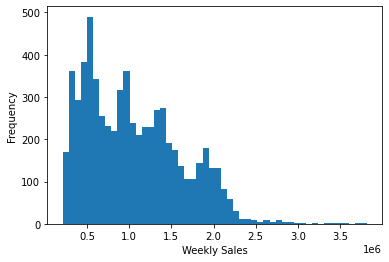

In [194]:
import matplotlib.pyplot as plt

# Plot histogram of 'Weekly_Sales'
plt.hist(data['Weekly_Sales'], bins=50)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

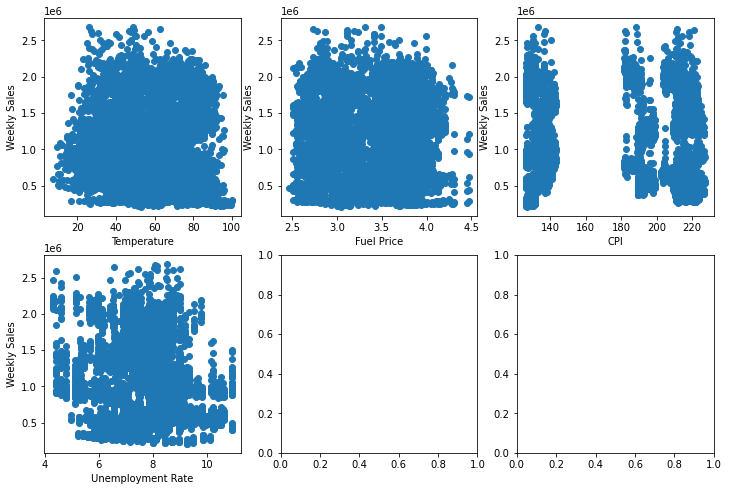

In [220]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].scatter(data['Temperature'], data['Weekly_Sales'])
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Weekly Sales')
axs[0, 1].scatter(data['Fuel_Price'], data['Weekly_Sales'])
axs[0, 1].set_xlabel('Fuel Price')
axs[0, 1].set_ylabel('Weekly Sales')
axs[0, 2].scatter(data['CPI'], data['Weekly_Sales'])
axs[0, 2].set_xlabel('CPI')
axs[0, 2].set_ylabel('Weekly Sales')
axs[1, 0].scatter(data['Unemployment'], data['Weekly_Sales'])
axs[1, 0].set_xlabel('Unemployment Rate')
axs[1, 0].set_ylabel('Weekly Sales')
plt.show()

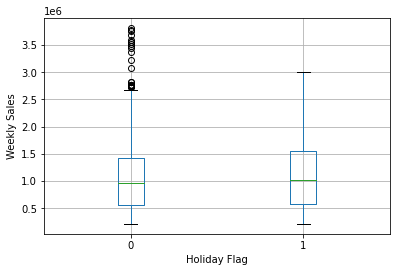

In [196]:
data.boxplot(column='Weekly_Sales', by='Holiday_Flag')
plt.title('')
plt.suptitle('')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

In [197]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data=data.drop(columns=['Date'])
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5
2010-02-05,37,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5
2010-02-05,17,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5
2010-02-05,30,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5


In [198]:
data.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,,
2012-10-26,25,688940.94,0,56.69,3.882,216.151590,7.293,2012,10,43
2012-10-26,5,319550.77,0,71.70,3.506,224.037814,5.422,2012,10,43
2012-10-26,40,921264.52,0,49.65,3.917,138.728161,4.145,2012,10,43
2012-10-26,18,1127516.25,0,56.09,3.917,138.728161,8.243,2012,10,43
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,2012,10,43


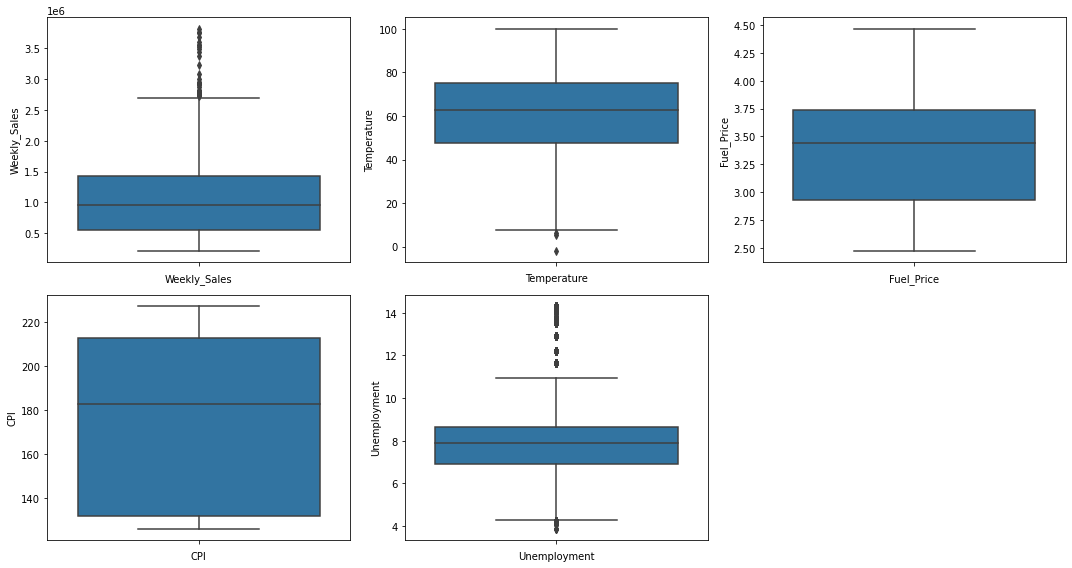

In [199]:
n=1
cols =data[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]]
plt.figure( figsize=(15, 8))
for col in cols:
    plt.subplot(2, 3, n)
    if n<=5:
        sns.boxplot(y=data[col])
        plt.xlabel(col)
        n+=1
plt.tight_layout()
plt.show()

In [200]:
columns = ['Weekly_Sales', 'Temperature', 'Unemployment']  

for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

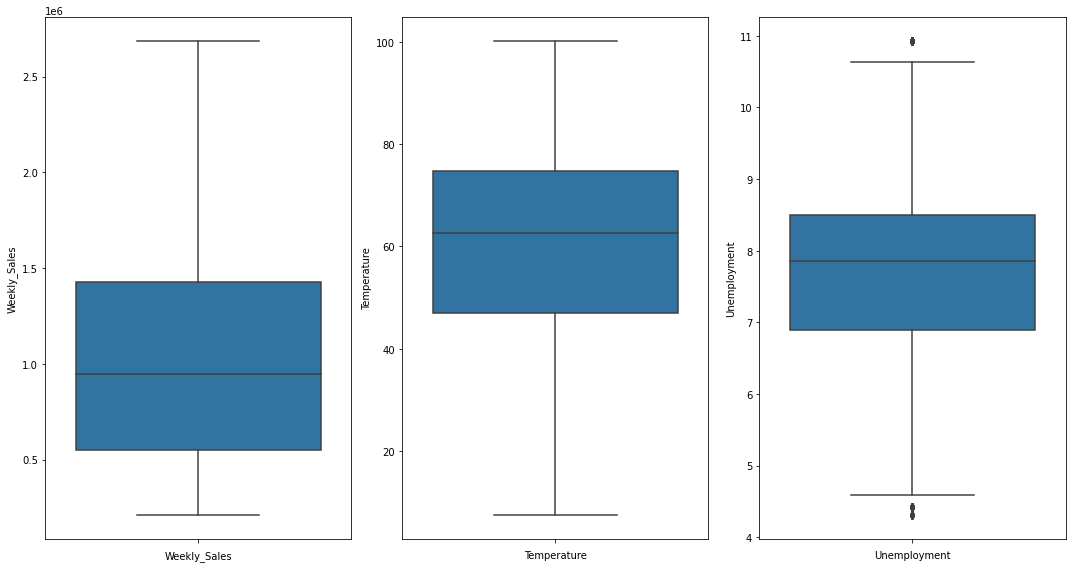

In [201]:
n=1
cols =data[["Weekly_Sales","Temperature","Unemployment"]]
plt.figure( figsize=(15, 8))
for col in cols:
    plt.subplot(1, 3, n)
    if n<=3:
        sns.boxplot(y=data[col])
        plt.xlabel(col)
        n+=1
plt.tight_layout()
plt.show()

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [203]:
X = data.drop(['Weekly_Sales'], axis=1)  # Features
y = data['Weekly_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [207]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,
2010-02-05,1,0,42.31,2.572,211.096358,8.106,2010,2,5
2010-02-05,10,0,54.34,2.962,126.442065,9.765,2010,2,5
2010-02-05,37,0,45.97,2.572,209.852966,8.554,2010,2,5
2010-02-05,17,0,23.11,2.666,126.442065,6.548,2010,2,5
2010-02-05,30,0,39.05,2.572,210.752605,8.324,2010,2,5


In [208]:
y.head()

Date
2010-02-05    1643690.90
2010-02-05    2193048.75
2010-02-05     536006.73
2010-02-05     789036.02
2010-02-05     465108.52
Name: Weekly_Sales, dtype: float64

In [210]:
X_train.shape

(4733, 9)

In [211]:
X_test.shape

(1184, 9)

In [212]:
y_train.shape

(4733,)

In [213]:
y_test.shape

(1184,)

Mean Squared Error: 16837106362.623793


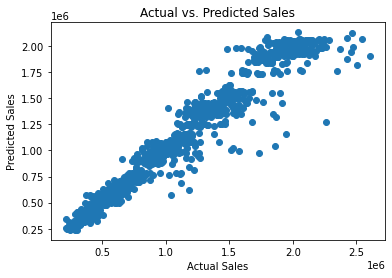

In [214]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Store', 'Holiday_Flag']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessing and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot actual vs. predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

In [215]:
from sklearn.metrics import mean_squared_error, r2_score

In [216]:
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('R-squared:', r2)
print('Adjusted R-squared:', adjusted_r2)

R-squared: 0.9463969333379652
Adjusted R-squared: 0.9459860069325492


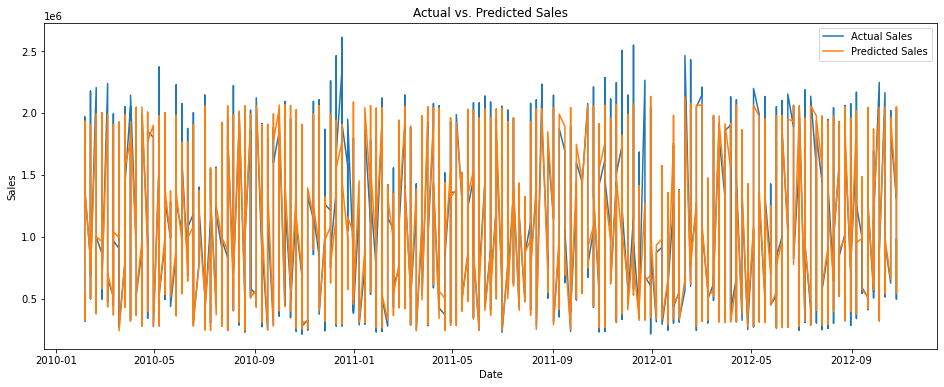

In [217]:
plt.figure(figsize=(16, 6))
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Sales')
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

In [106]:
from datetime import datetime, timedelta

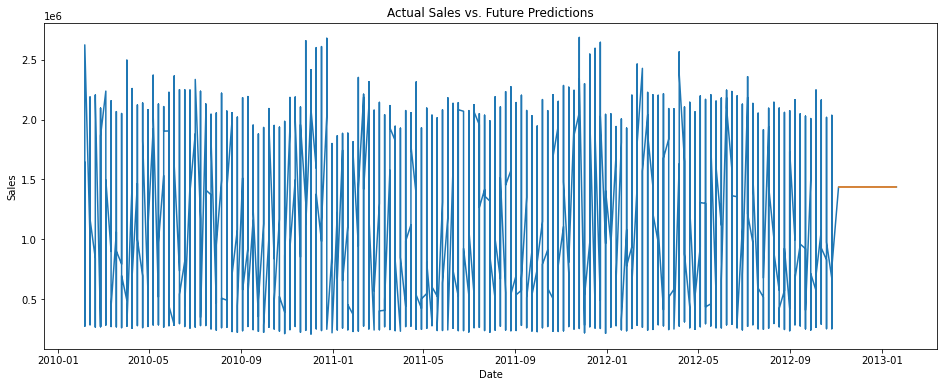

In [218]:
last_date = data.index.max()  # Get the last available date in the dataset
future_dates = pd.date_range(start=last_date + timedelta(weeks=1), periods=12, freq='W')  # Generate next 12 weeks of dates

# Generate features for the future predictions
future_data = pd.DataFrame(index=future_dates, columns=X.columns)
future_data['Month'] = future_data.index.month
future_data['DayOfWeek'] = future_data.index.dayofweek


# Make predictions for the future period
future_predictions = model.predict(future_data)

# Combine original sales data and future sales predictions
combined_data = pd.concat([data['Weekly_Sales'], pd.Series(future_predictions, index=future_dates)])

# Plot actual sales data and future sales predictions
plt.figure(figsize=(16, 6))
plt.plot(combined_data.index, combined_data.values, label='Actual Sales')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Future Predictions')
plt.show()

In [2]:
data_forecast = data[['Date','Weekly_Sales']]

In [3]:
data_forecast

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53


In [4]:
df = data_forecast.groupby('Date').sum()

In [46]:
df

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [5]:
df=df.resample(rule='W').sum()

In [6]:
df

,Weekly_Sales
Date,
2010-02-07,49750740.50
2010-02-14,48336677.63
2010-02-21,48276993.78
2010-02-28,43968571.13
2010-03-07,46871470.30
...,...
2012-09-30,43734899.40
2012-10-07,47566639.31
2012-10-14,46128514.25


<Axes: xlabel='Date'>

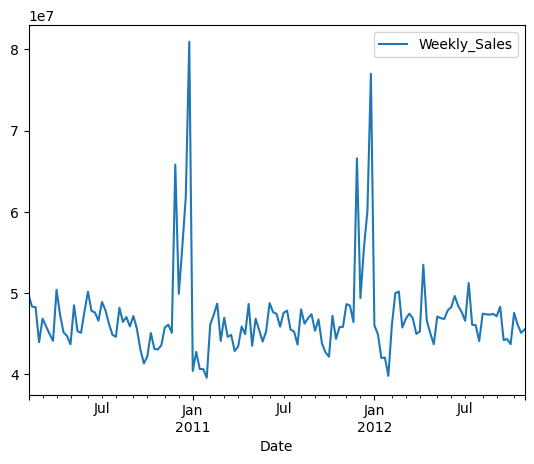

In [7]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result = adfuller(df['Weekly_Sales'])

In [13]:
result

(-5.908297957186334,
 2.675979158986027e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [14]:
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis)')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis)')

Test Statistic: -5.908297957186334
P-value: 2.675979158986027e-07
The time series is stationary (reject the null hypothesis)


In [17]:
import io, os, sys, setuptools, tokenize


In [18]:
!pip install prophet


     ---------------------------------------- 12.9/12.9 MB 8.5 MB/s eta 0:00:00
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.32-py3-none-any.whl (754 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)


In [25]:
import prophet


In [35]:
df.reset_index(inplace=True)
df.rename(columns={'Date': 'ds', 'Weekly_Sales' : 'y'}, inplace=True)

In [39]:
df.drop('index', axis = 1)

,ds,y
0,2010-02-07,49750740.50
1,2010-02-14,48336677.63
2,2010-02-21,48276993.78
3,2010-02-28,43968571.13
4,2010-03-07,46871470.30
...,...,...
138,2012-09-30,43734899.40
139,2012-10-07,47566639.31
140,2012-10-14,46128514.25
141,2012-10-21,45122410.57


In [48]:
christmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime(['2010-12-25', '2011-12-25', '2012-12-25',.2012-12-25. ]),  # Add more years as needed
    'lower_window': -30,
    'upper_window': 0,
})

In [49]:
model = prophet.Prophet(holidays=christmas)
model.fit(df)

14:30:51 - cmdstanpy - INFO - Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='368 days', period='180 days', horizon='365 days')


  0%|          | 0/2 [00:00<?, ?it/s]

14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:24 - cmdstanpy - INFO - Chain [1] start processing
14:41:24 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


In [69]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,34 days,8.809877e+12,2.968144e+06,2.238432e+06,0.044235,0.029302,0.045903,0.7
1,36 days,1.170917e+14,1.082089e+07,5.499951e+06,0.110224,0.041678,0.095246,0.6
2,41 days,1.166005e+14,1.079817e+07,5.281186e+06,0.105555,0.029302,0.090462,0.6
3,43 days,2.823851e+14,1.680432e+07,8.923110e+06,0.169940,0.029302,0.134525,0.6
4,48 days,2.823493e+14,1.680325e+07,8.884393e+06,0.169064,0.029302,0.133639,0.6
...,...,...,...,...,...,...,...,...
91,351 days,1.302785e+13,3.609411e+06,2.564627e+06,0.052724,0.046229,0.055458,0.7
92,356 days,1.107463e+13,3.327856e+06,2.250011e+06,0.046149,0.038837,0.048417,0.8
93,358 days,1.112448e+13,3.335338e+06,2.307918e+06,0.047426,0.038837,0.049682,0.8
94,363 days,1.063633e+13,3.261339e+06,2.131818e+06,0.043545,0.030390,0.045678,0.8


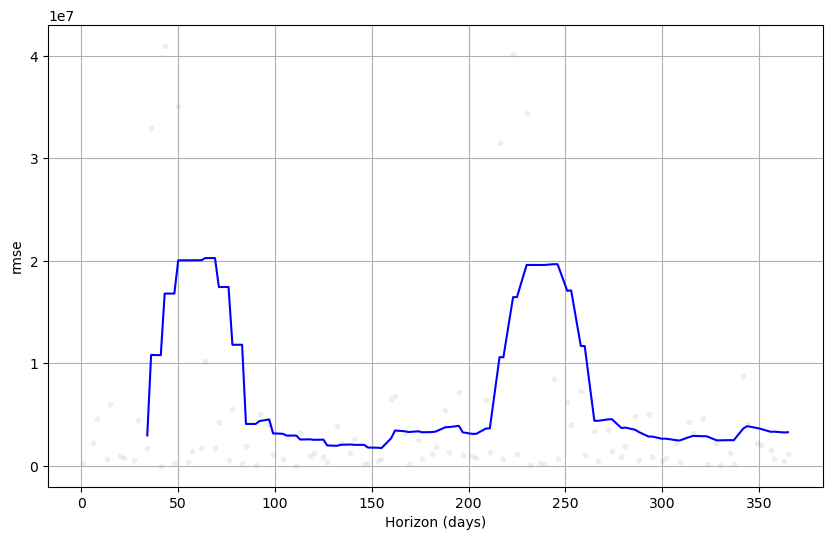

In [72]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [61]:
future = model.make_future_dataframe(periods=3, freq='M') 


In [62]:
forecast = model.predict(future)

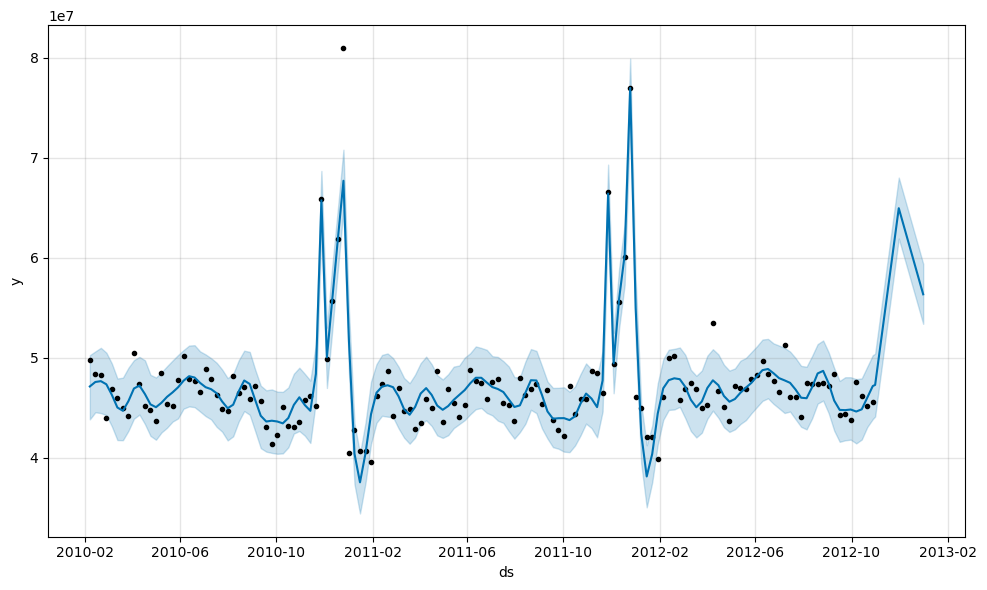

In [64]:
fig = model.plot(forecast)
